In [24]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import glob
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [25]:
FOLDER_MINUTES_TXT = "./data/processed/copom_minutes_processed"
FOLDER_CORPUS_TXT = "./data/processed/copom_minutes_corpus"

In [26]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

In [27]:
def preprocess_text(text):

    text = text.lower()

    tokens = word_tokenize(text)
    stop_words_english = set(stopwords.words('english'))
    pos_tagged_tokens = nltk.pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []

    for word, tag in pos_tagged_tokens:
        if word not in stop_words_english and word.isalpha() and len(word) > 1:
            wordnet_pos = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
            lemmatized_tokens.append(lemma)
            
    return lemmatized_tokens

In [28]:
filepaths = glob.glob(f"{FOLDER_MINUTES_TXT}/*.txt")

for path in filepaths:
    filename = os.path.basename(path)
        
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
        paragraphs = [p.strip() for p in copom_minute.split('\n\n') if p.strip()]
        
    lemm_texts = [preprocess_text(p) for p in paragraphs]

    with open(f"{FOLDER_CORPUS_TXT}/{filename}", 'w', encoding='utf-8') as f:
        for paragraph in lemm_texts:
            line = ' '.join(paragraph)
            f.write(line + '\n')



In [30]:
all_minutes = ""

filepaths = glob.glob(f"{FOLDER_CORPUS_TXT}/*.txt")

for path in filepaths:
    filename = os.path.basename(path)
        
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
        all_minutes += text


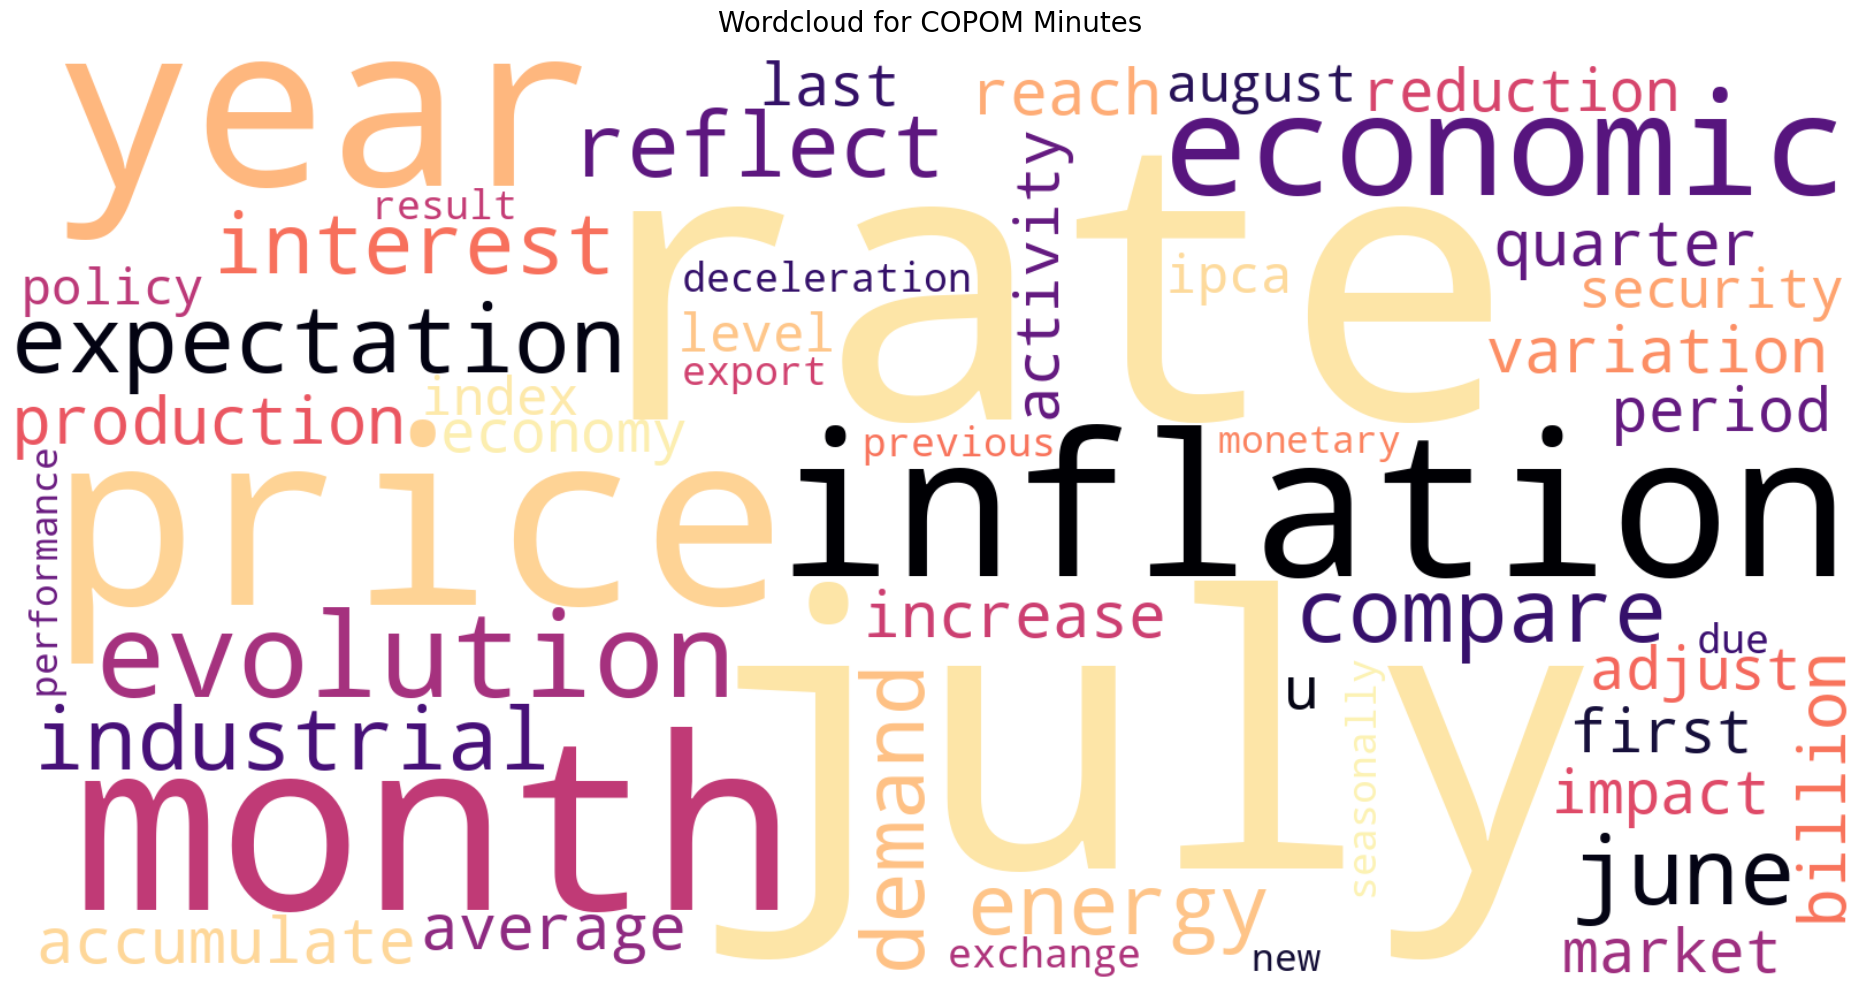

In [33]:
stopwords_set = set(nltk.corpus.stopwords.words('english'))

wordcloud = WordCloud(
    stopwords=stopwords_set,
    background_color="white",
    width=1600,
    height=800,
    max_words=50,
    colormap='magma',
    collocations=False
).generate(all_minutes)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for COPOM Minutes', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

plt.close()